In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import matplotlib
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv
/kaggle/input/3image/3.jfif


In [2]:
data=pd.read_csv('../input/digit-recognizer/train.csv')

In [3]:
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Saperate data into x and y

In [4]:
x=data.drop(['label'],1)
y=data['label']

In [5]:
x=np.array(x)

Check data

1


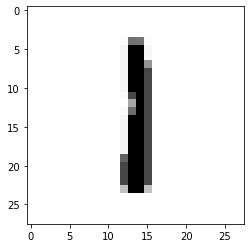

In [6]:
i=2
some_digit=x[i]
some_digit_image=some_digit.reshape(28,28)
plt.imshow(some_digit_image,cmap=matplotlib.cm.binary,interpolation='nearest')
print(y[i])

In [7]:
x[5].shape

(784,)

LogisticRegression model

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

Train model

In [9]:
LM=RandomForestClassifier()
LM.fit(x,y)

RandomForestClassifier()

Testing data

In [10]:
data_test=pd.read_csv('../input/digit-recognizer/test.csv')

convert data_test into array

In [11]:
test=np.array(data_test)

In [12]:
test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [13]:
predict_y=LM.predict(test)

In [14]:
predict_y

array([2, 0, 9, ..., 3, 9, 2])

Sample output

In [15]:
predict_y.shape

(28000,)

Creating dataframe of the output(predic_y)

In [16]:
out_dist={'ImageId':[a for a in range(1,28001)],'Label':predict_y}
answ=pd.DataFrame(out_dist)

In [17]:
answ.to_csv('submission.csv', index=False)

In [18]:
answ

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


**TEST USING REAL IMAGE**

In [19]:
from PIL import Image, ImageGrab

[3]


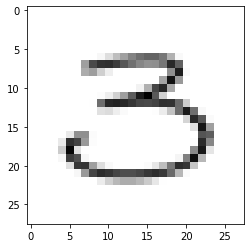

In [20]:
im1 = Image.open('../input/3image/3.jfif')
def predict_digit1(img):
    img = img.convert('L', dither=Image.NONE)
    img = img.resize((28,28))
    img = np.array(img)
    img=np.invert(img)
    plt.imshow(img,cmap=matplotlib.cm.binary,interpolation='nearest')
    res = LM.predict([img.flatten()])
    return res
print(predict_digit1(im1))

You can see that it clearely identify the image but its miss identify  in many Cases